In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_html('https://fbref.com/en/comps/10/2023-2024/2023-2024-Championship-Stats', attrs = {"id" : "results2023-2024101_overall"})[0]

In [3]:
df = df.sort_values(by='xGD', ascending=False).reset_index(drop=True)

In [4]:
df['Badge'] = df['Squad'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

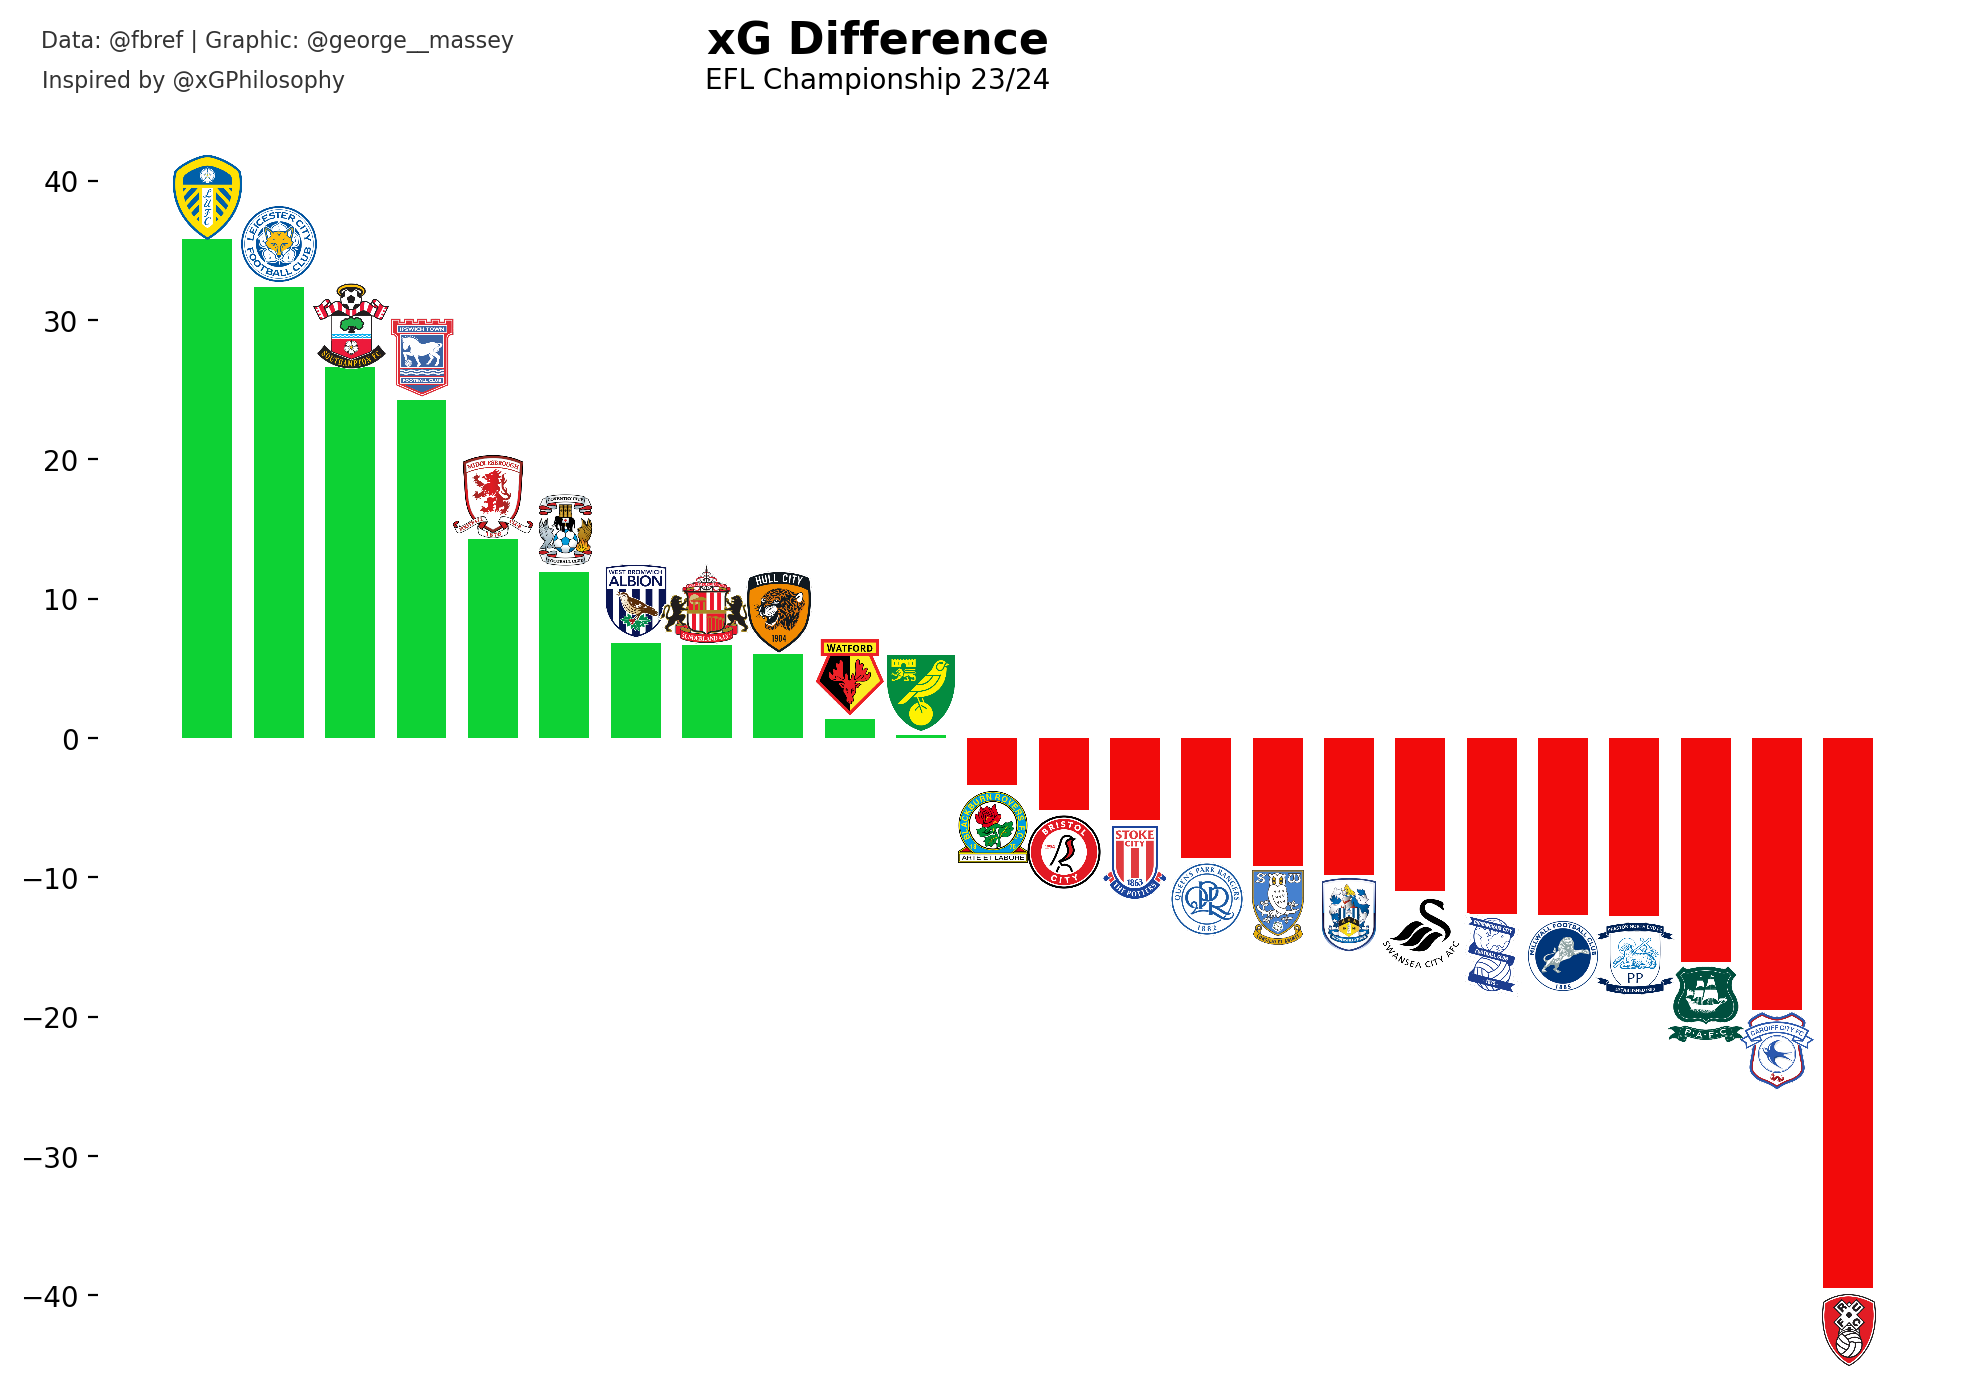

In [9]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10),dpi = 200)

# Plot the bars
bars = ax.bar(df['Squad'], df['xGD'], width = 0.7,color=[
    '#0DD234' if xg > 0 else '#F20A0A' for xg in df['xGD']])

# Add team logos to the bars
for i, bar in enumerate(bars):
    team_name = df.loc[i, 'Squad']
    badge_path = df.loc[i, 'Badge']
    image = mpimg.imread(badge_path)
    imagebox = OffsetImage(image, zoom=0.095)
    y_coordinate = bar.get_height() + 3 if df.loc[i, 'xGD'] > 0 else bar.get_height() - 3
    ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, y_coordinate), frameon=False)
    ax.add_artist(ab)

# Remove the x-axis tick labels
ax.set_xticklabels([])

# Remove the axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# Add dotted lines from each y tick
#for tick in ax.get_yticks():
 #   ax.axhline(y=tick, linestyle='dotted', color='gray', alpha=0.5)

# Add labels and title
ax.set_xticks([])
ax.set_yticks([-40,-30,-20,-10,0,10,20,30,40])
# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.3)
fig.text(0.45, 0.95, 'xG Difference', fontsize=16, alpha=1, color = 'black', ha='center', va='center', weight='bold')
fig.text(0.45, 0.93, 'EFL Championship 23/24', fontsize=10, alpha=1, color = 'black', ha='center', va='center')
fig.text(0.2, 0.95, 'Data: @fbref | Graphic: @george__massey', fontsize=8, alpha=0.8, color = 'black', ha='center', va='center')
fig.text(0.165, 0.93, 'Inspired by @xGPhilosophy', fontsize=8, alpha=0.8, color = 'black', ha='center', va='center')
# Display the plot
plt.show()


In [ ]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/xGD.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)